In [1]:
import mne
import matplotlib.pyplot as plt
import numpy as np
import os
import os.path
#import sklearn
from mne.preprocessing import (ICA, create_eog_epochs, create_ecg_epochs,
                               corrmap)

In [2]:
#loaded the data
def load_data(filename):
    data_folder = os.path.join("data", filename)
    file_to_open = os.path.join(data_folder, "data_primary.bdf")
    raw = mne.io.read_raw_bdf(file_to_open, eog=None, misc=None, stim_channel='auto', exclude= 'None', preload=False, verbose=None)
    return raw 

filename = "ctrl01"
raw = load_data("ctrl01")
print(raw)
print(raw.info)
raw.crop(tmax=54.022)

Extracting EDF parameters from C:\Users\leela\crcns-fc3-ls2km-sa2dy\data\ctrl01\data_primary.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
<RawEDF | data_primary.bdf, 73 x 2682880 (2620.0 s), ~143 kB, data not loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 72 EEG, 1 STIM
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 208.0 Hz
 meas_date: 2014-11-19 16:08:43 UTC
 nchan: 73
 projs: []
 sfreq: 1024.0 Hz
>


<RawEDF | data_primary.bdf, 73 x 55320 (54.0 s), ~143 kB, data not loaded>

Effective window size : 2.000 (s)


<ipython-input-3-edbd5d4bb9e0>:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data.plot_psd()


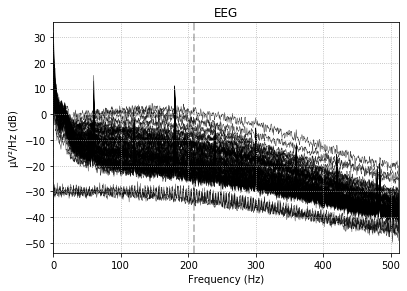

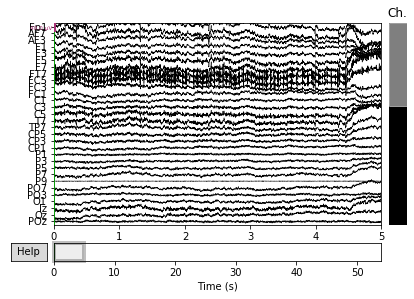

In [3]:
#visualize the data
def psd_plot(data, duration=5, n_channels =30):
  data.plot_psd()
  data.plot(duration=duration, n_channels=n_channels)

data = raw
psd_plot(data)

In [4]:
#remove bad channels
def exclude_bad_channels(data,bad_channels):
    data.info['bads'].extend(bad_channels)
    good_eeg = mne.pick_types(raw.info, meg=False, eeg = True)
    all_eeg = mne.pick_types(raw.info, meg=False, eeg=True, exclude=[])
    return(good_eeg, all_eeg)

drop = ['P9', 'Fpz','Fz']
good_eeg, all_eeg = exclude_bad_channels(raw, drop)

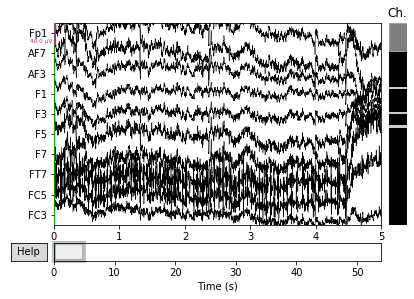

Reading 0 ... 55319  =      0.000 ...    54.022 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3379 samples (3.300 sec)



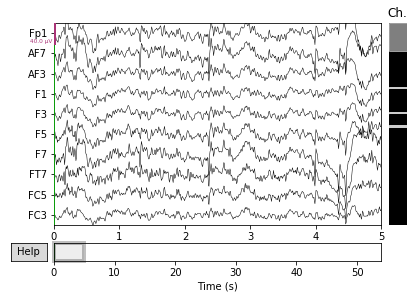

In [5]:
#filtering data to remove slow drifts

def filter(data,duration=5,n_channels=10,l_freq=1,h_freq=40): 
    data.plot(duration=duration, n_channels=n_channels)
    data.load_data().filter(l_freq=l_freq, h_freq=h_freq)
    data.plot(duration=duration, n_channels=n_channels)

data=raw
filter(raw)

Fitting ICA to data using 69 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 10 components
Fitting ICA took 0.9s.


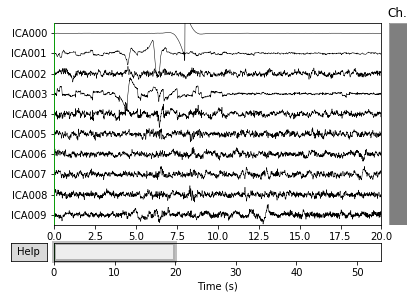

In [11]:
#fit the ICA
def ica_fit(data,components):
    ica = ICA(n_components=components, random_state=97)
    ica.fit(data)
    ica.plot_sources(data)
    return ica
data=raw
components=10
ica = ica_fit(data,components)

Transforming to ICA space (10 components)
Zeroing out 3 ICA components


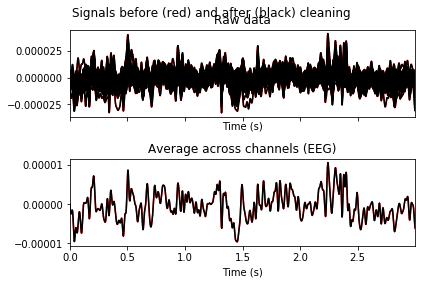

Transforming to ICA space (10 components)
Zeroing out 3 ICA components


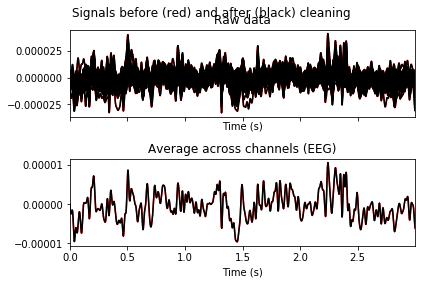

Transforming to ICA space (10 components)
Zeroing out 3 ICA components


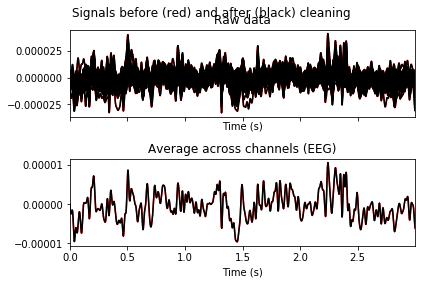

Transforming to ICA space (10 components)
Zeroing out 4 ICA components


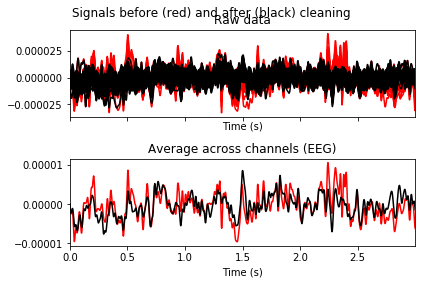

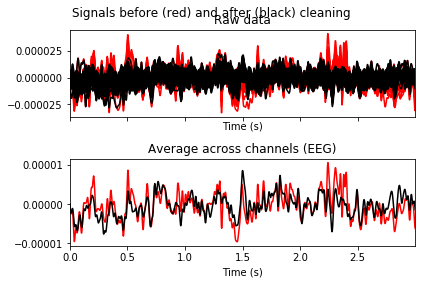

In [26]:
#visualize different ICA components
ica.plot_overlay(raw, exclude=[1], picks='eeg')
ica.plot_overlay(raw, exclude=[2], picks='eeg')
ica.plot_overlay(raw, exclude=[3], picks='eeg')
ica.plot_overlay(raw, exclude=[4], picks='eeg')

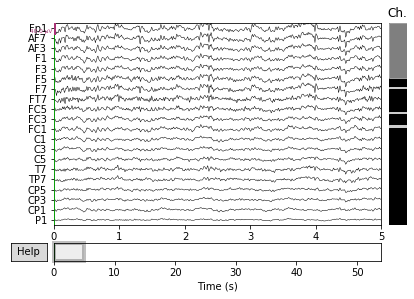

Transforming to ICA space (10 components)
Zeroing out 4 ICA components


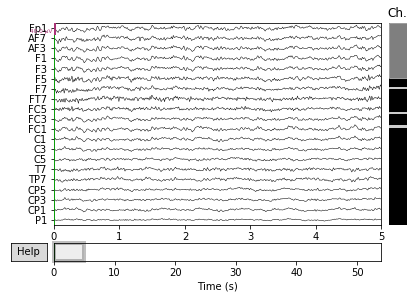

In [27]:
#apply the ICA
def ica_apply(data,exclude,duration=5,n_channels=20):
    data.plot(duration=duration, n_channels=n_channels)
    ica.exclude = exclude
    ica.apply(data)
    data.plot(duration=5, n_channels=20) 
data=raw
exclude = [1,2,3,4]
ica_apply(data,exclude)

Effective window size : 2.000 (s)


<ipython-input-3-edbd5d4bb9e0>:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data.plot_psd()


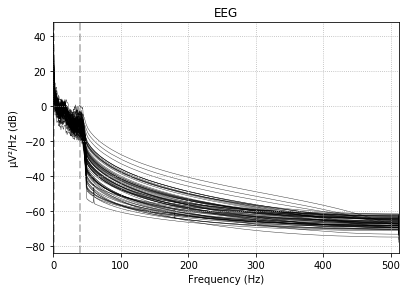

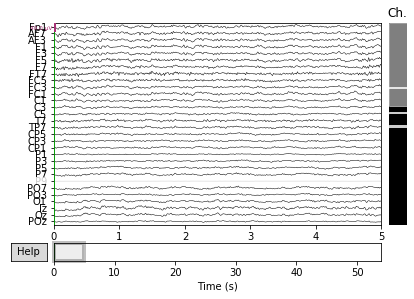

In [28]:
#plot the data again
data = raw
psd_plot(data)

Extracting EDF parameters from C:\Users\leela\crcns-fc3-ls2km-sa2dy\data\pfc02\data_primary.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
<RawEDF | data_primary.bdf, 73 x 1794048 (1752.0 s), ~143 kB, data not loaded>
<Info | 7 non-empty values
 bads: []
 ch_names: Fp1, AF7, AF3, F1, F3, F5, F7, FT7, FC5, FC3, FC1, C1, C3, C5, ...
 chs: 72 EEG, 1 STIM
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 208.0 Hz
 meas_date: 2014-12-02 13:01:32 UTC
 nchan: 73
 projs: []
 sfreq: 1024.0 Hz
>
Effective window size : 2.000 (s)


<ipython-input-3-edbd5d4bb9e0>:3: RuntimeWarning: Channel locations not available. Disabling spatial colors.
  data.plot_psd()


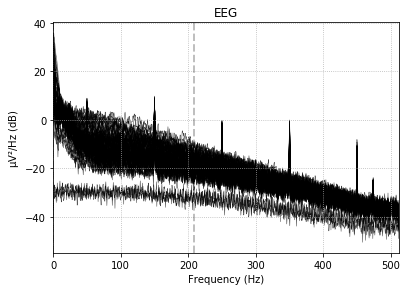

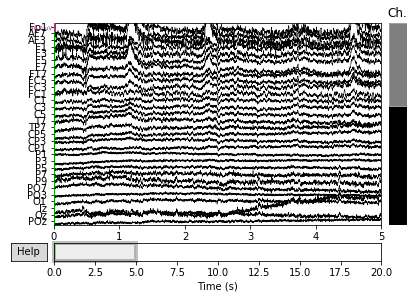

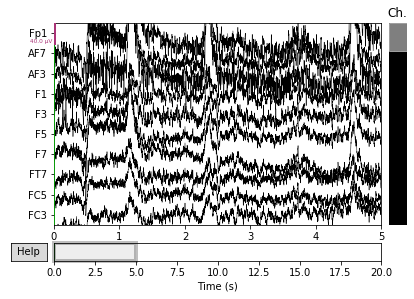

Reading 0 ... 20480  =      0.000 ...    20.000 secs...
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 3379 samples (3.300 sec)



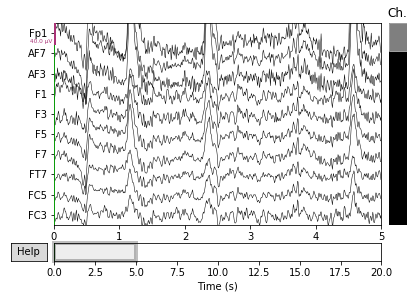

In [50]:
#do the same for the pfc patient dataset

#load the data
filename = "pfc02"
raw2 = load_data("pfc02")
print(raw2)
print(raw2.info)
raw2.crop(tmin=980,tmax=1000)

#plot the data
data = raw2
psd_plot(data)

#no bad channels in this data set

#filtering data to remove slow drifts
data = raw2
filter(data)

Fitting ICA to data using 72 channels (please be patient, this may take a while)
Inferring max_pca_components from picks
Selecting by number: 15 components
Fitting ICA took 0.8s.


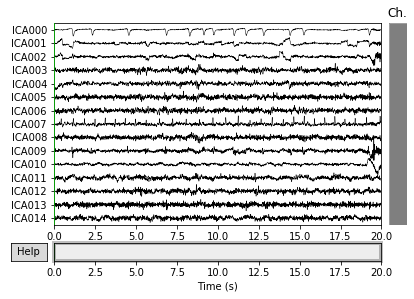

<ICA  |  raw data decomposition, fit (fastica): 20481 samples, 15 components, channels used: "eeg">

In [51]:
#fit the ICA
data=raw2
components=15
ica_fit(data,components)

Transforming to ICA space (10 components)
Zeroing out 4 ICA components


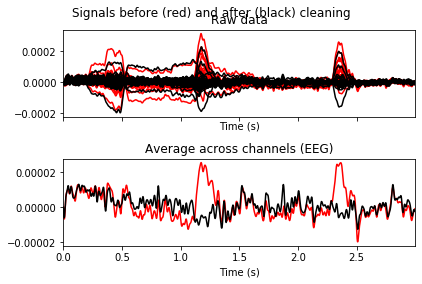

Transforming to ICA space (10 components)
Zeroing out 4 ICA components


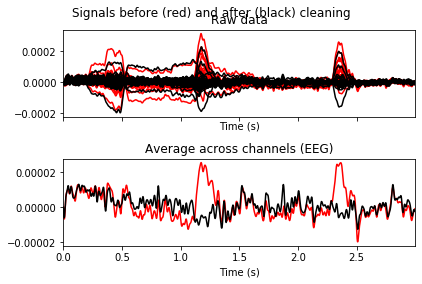

Transforming to ICA space (10 components)
Zeroing out 4 ICA components


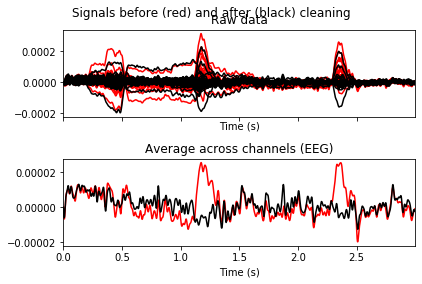

Transforming to ICA space (10 components)
Zeroing out 4 ICA components


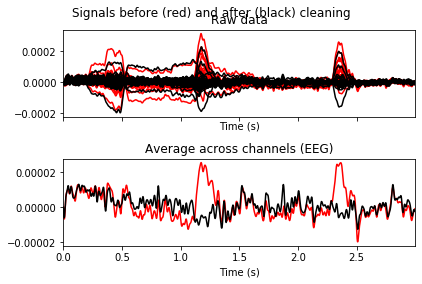

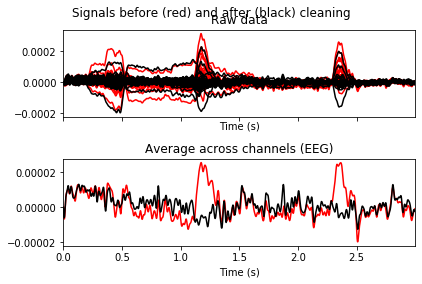

In [52]:
#visualize different ICA components
ica.plot_overlay(raw2, exclude=[0], picks='eeg')
ica.plot_overlay(raw2, exclude=[7], picks='eeg')
ica.plot_overlay(raw2, exclude=[1], picks='eeg')
ica.plot_overlay(raw2, exclude=[4], picks='eeg')

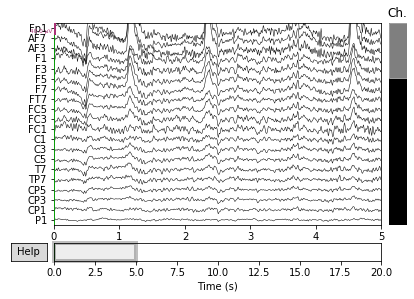

Transforming to ICA space (10 components)
Zeroing out 4 ICA components


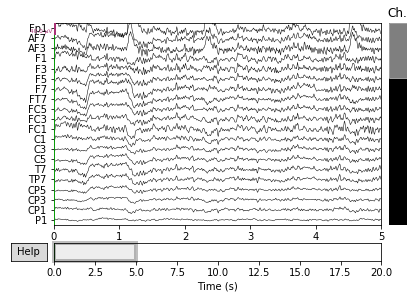

In [53]:
#apply the ICA
data = raw2
exclude = [0,7,1,4]
ica_apply(data,exclude)

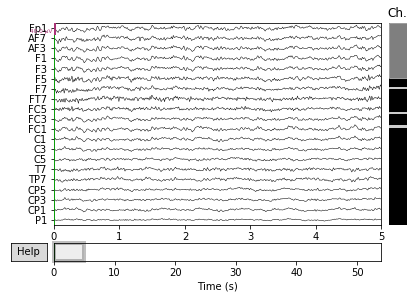

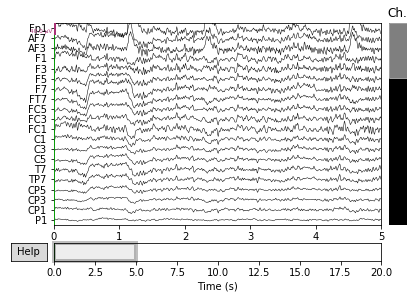

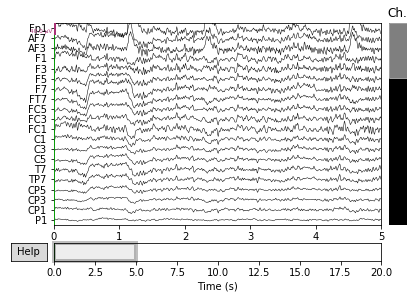

In [55]:
#compare the two
raw.plot(duration=5, n_channels=20)
raw2.plot(duration=5, n_channels=20)
